## HEART FAILURE PREDICTION

I

AM OLANIPEKUN TEMITOPE....This is my prediction for this dataset... 


## ABOUT THE DATASET

This  dataset  was updated some days ago to the day i downloaded it on kaggle in the year 2020,taking note....

that it is very sensitive i.e the dataset,which is basically talking about heart failure,SURE..

that we know that cardiverscular diseases(CVDS) are the number 1 cause of death globally,taking an estimated

17.9 million lives each year,which accounts  for 31% of all deaths world wide....

Heartfailure is a  common  event caused by CVDS, and this dataset contains 12 features that can be used to predict

mortality by heart failure..

This diseases can actually be prevented by addressing behavioural risk factors such as  tobaaco use,unhealthy diet

and obesity,pyhsical inactivity and harmful use of alchol using population-wide strategies...




## WHAT AM TO DO

Build a model for predicting the mortality caused by HEART FAILURE


In [ ]:
ENJOY THE RIDE....

In [6]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='dark')

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Suppressing all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [8]:
df = pd.read_csv('Heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Getting  detail statistics about the data.....

In [11]:
def detailed_analysis(df1, pred=None):
  obs = df1.shape[0]
  types = df1.dtypes
  counts = df1.apply(lambda x: x.count())
  uniques = df1.apply(lambda x: [x.unique()])
  nulls = df1.apply(lambda x: x.isnull().sum())
  distincts = df1.apply(lambda x: x.unique().shape[0])
  missing_ratio = (df1.isnull().sum() / obs) * 100
  skewness = df1.skew()
  kurtosis = df1.kurt()
  print('Data shape:', df1.shape)

  if pred is None:
    cols = ['types', 'counts', 'nulls', 'distincts', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
    details = pd.concat([types, counts, nulls, distincts, missing_ratio, uniques, skewness, kurtosis], axis=1)
  else:
    corr = df1.corr()[pred]
    details = pd.concat([types, counts, nulls, distincts, missing_ratio, uniques, skewness, kurtosis, corr], axis=1, sort=False)
    corr_col = 'corr ' + pred
    cols = ['types', 'counts', 'nulls', 'distincts', 'missing ratio', 'uniques', 'skewness', 'kurtosis', corr_col]

  details.columns = cols
  dtypes = details.types.value_counts()
  print('____________________________\nData types:\n', dtypes)
  print('____________________________')
  return details

In [12]:
details = detailed_analysis(df, 'DEATH_EVENT')
display(details.sort_values(by='corr DEATH_EVENT', ascending=False))

Data shape: (299, 13)
____________________________
Data types:
 int64      10
float64     3
Name: types, dtype: int64
____________________________


,types,counts,nulls,distincts,missing ratio,uniques,skewness,kurtosis,corr DEATH_EVENT
DEATH_EVENT,int64,299,0,2,0.0,"[[1.0, 0.0]]",0.770349,-1.416080,1.000000
serum_creatinine,float64,299,0,40,0.0,"[[1.9, 1.1, 1.3, 2.7, 2.1, 1.2, 1.5, 9.4, 4.0,...",4.455996,25.828239,0.294278
age,float64,299,0,47,0.0,"[[75.0, 55.0, 65.0, 50.0, 90.0, 60.0, 80.0, 62...",0.423062,-0.184871,0.253729
high_blood_pressure,int64,299,0,2,0.0,"[[1.0, 0.0]]",0.626732,-1.618076,0.079351
anaemia,int64,299,0,2,0.0,"[[0.0, 1.0]]",0.278261,-1.935563,0.066270
creatinine_phosphokinase,int64,299,0,208,0.0,"[[582.0, 7861.0, 146.0, 111.0, 160.0, 47.0, 24...",4.463110,25.149046,0.062728
diabetes,int64,299,0,2,0.0,"[[0.0, 1.0]]",0.333929,-1.901254,-0.001943
sex,int64,299,0,2,0.0,"[[1.0, 0.0]]",-0.626732,-1.618076,-0.004316
smoking,int64,299,0,2,0.0,"[[0.0, 1.0]]",0.770349,-1.416080,-0.012623
platelets,float64,299,0,176,0.0,"[[265000.0, 263358.03, 162000.0, 210000.0, 327...",1.462321,6.209255,-0.049139


As we have done a summary,it looks kinda scattered a little,som peepz who go through this workbook will understand

from there directly while some would need to see it clearly

but to bring out the major informations to be clear

we would still proceed to show some things that needs to be known or seen.....

In [13]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

so we have actually checked and seen there is no NA in the dataset.....


so its time to clean the columns properly before we carry out further analysis.... 


Cleaning of the platelets column....

In [18]:
df['platelets'] = df['platelets'].astype(int)

Cleaning of the age column.....

In [20]:
df['age'] = df['age'].astype(int)

In [21]:
new_col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking','time',"DEATH_EVENT"]

In [22]:
 df[new_col].head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


so now that our data is clean we can now proceed on doing the major EDA

lets move....

In [65]:
df.describe().style.highlight_max(color = 'yellow').highlight_min(color = 'blue')
#this is showing the general statistics and also using the colours to denote the max and min values!!!!!

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.034510,4.412477,0.478136,0.467670,77.614208,0.467670
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [25]:
df.nunique()

age                          46
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [26]:
df['age'].unique()

array([75, 55, 65, 50, 90, 60, 80, 62, 45, 49, 82, 87, 70, 48, 68, 53, 95,
       58, 94, 85, 69, 72, 51, 57, 42, 41, 67, 79, 59, 44, 63, 86, 66, 43,
       46, 61, 81, 52, 64, 40, 73, 77, 78, 54, 47, 56])

Text(0.5, 0, 'age')

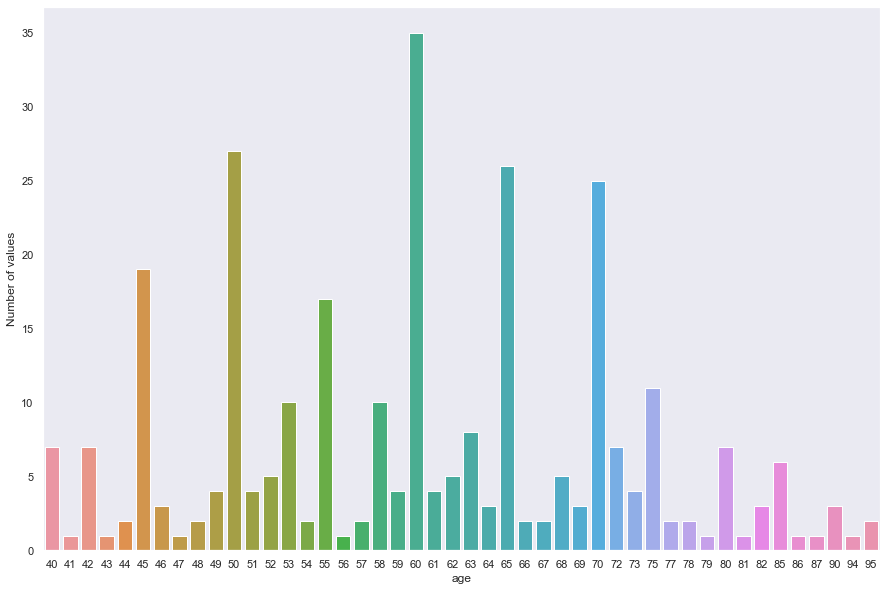

In [27]:
values = df.age.value_counts()
indexes = values.index

fig = plt.figure(figsize=(15, 10))
sns.barplot(indexes, values)

plt.ylabel('Number of values')
plt.xlabel('age')

SO we want to find out the rate at which people of different ages are affected by 

smoking,diabetes,aneamia and high blood pressure,because the actually enhances the possibilty of mortality rate...

In [ ]:
SMOKING

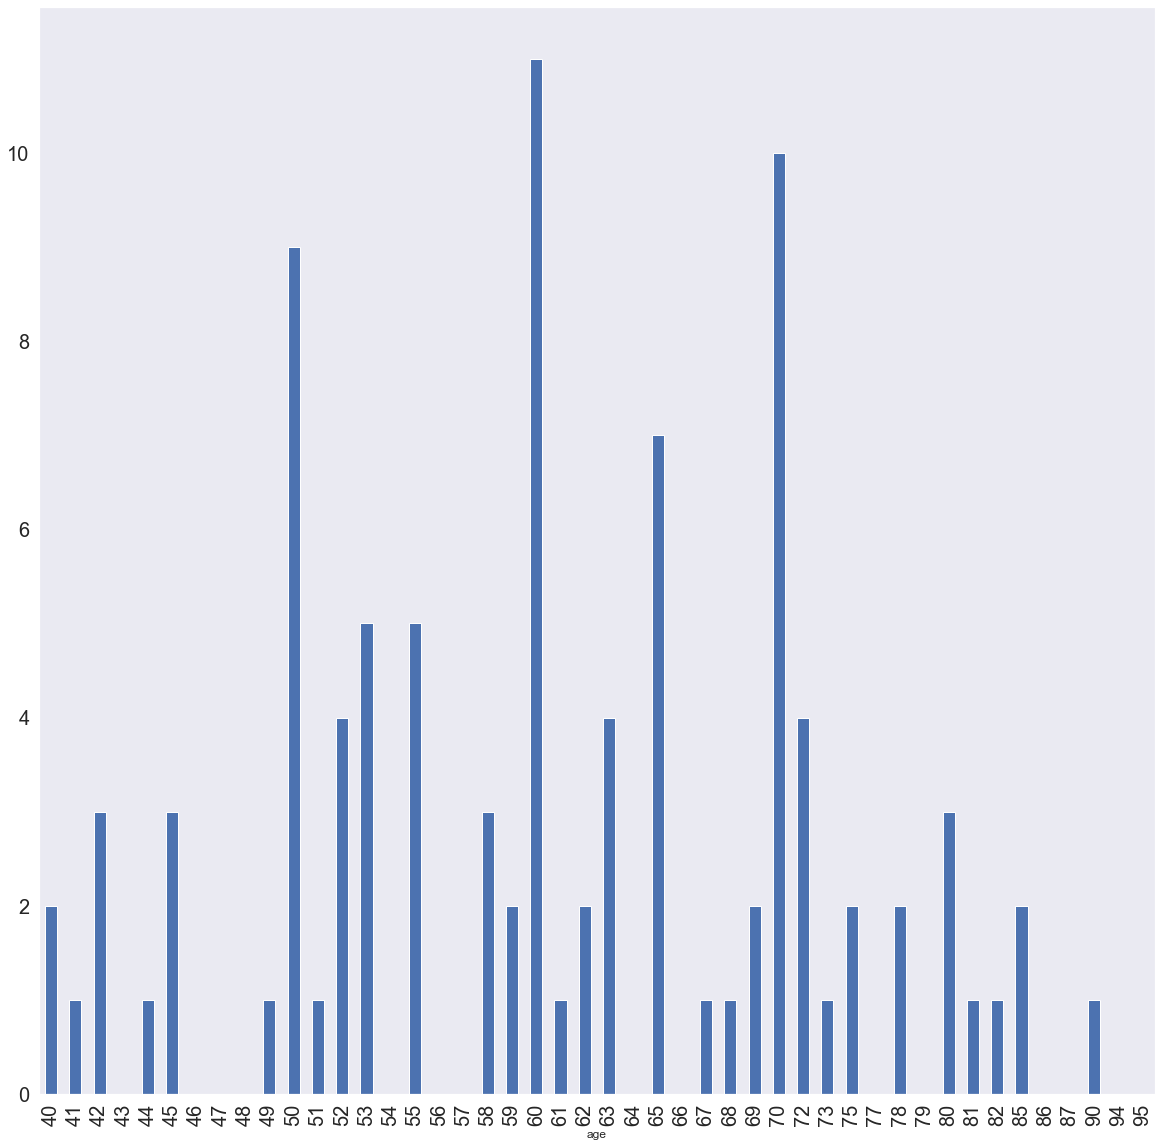

In [78]:
#This is showing the schools with graduate with less jobs
df.groupby('age')['smoking'].sum().plot(kind = 'bar',figsize = (20,20),fontsize = 20)

In [ ]:
DIABETES

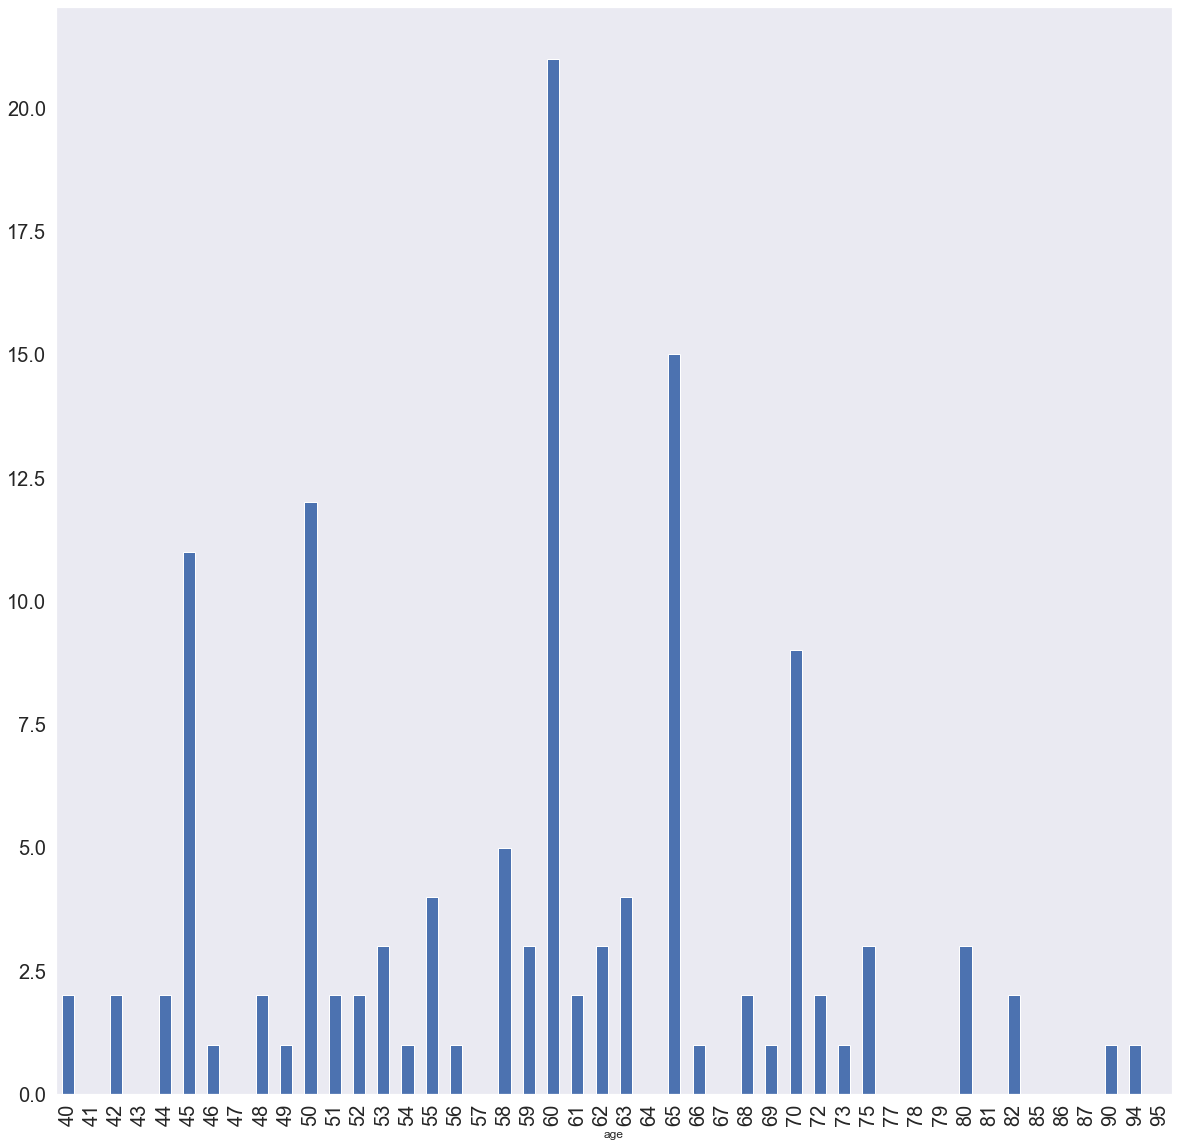

In [79]:
#This is showing the schools with graduate with less jobs
df.groupby('age')['diabetes'].sum().plot(kind = 'bar',figsize = (20,20),fontsize = 20)

In [ ]:
HBP

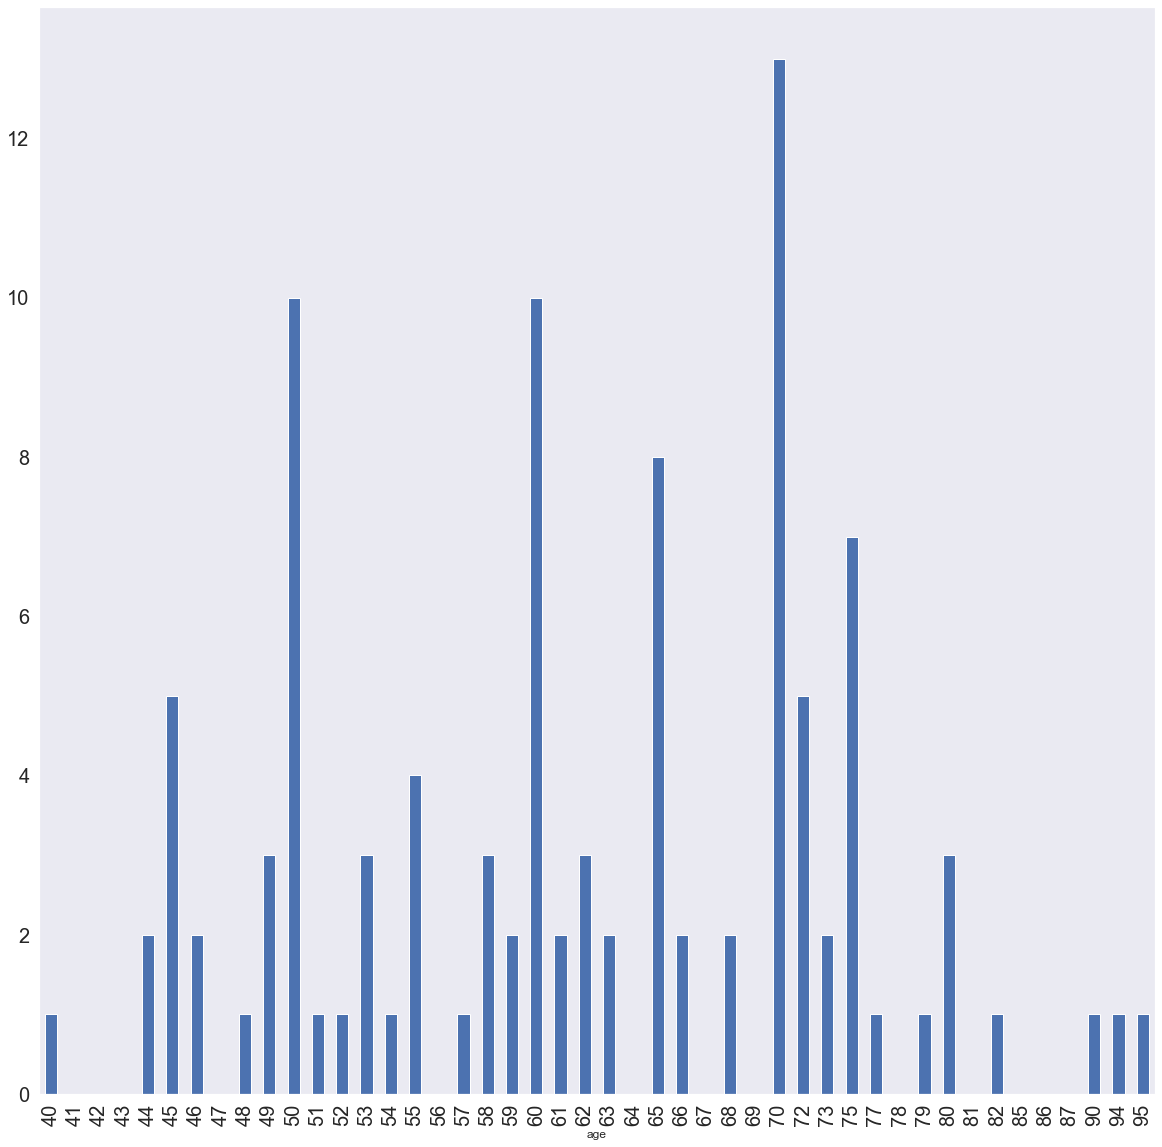

In [81]:
#This is showing the schools with graduate with less jobs
df.groupby('age')['high_blood_pressure'].sum().plot(kind = 'bar',figsize = (20,20),fontsize = 20)

In [ ]:
ANAEMIA

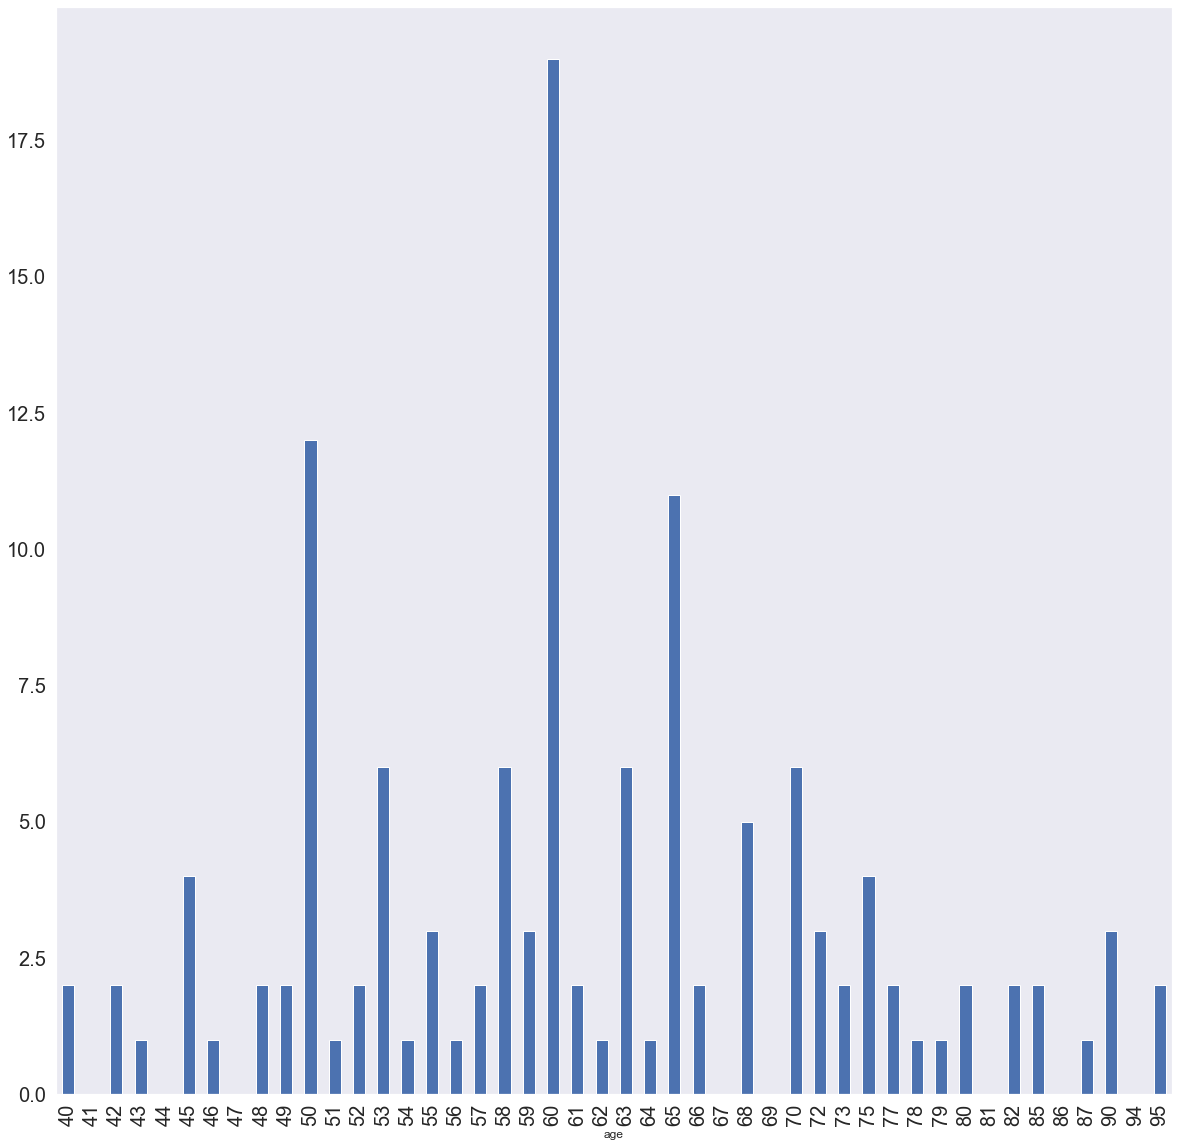

In [82]:
#This is showing the schools with graduate with less jobs
df.groupby('age')['anaemia'].sum().plot(kind = 'bar',figsize = (20,20),fontsize = 20)

<Figure size 720x720 with 0 Axes>

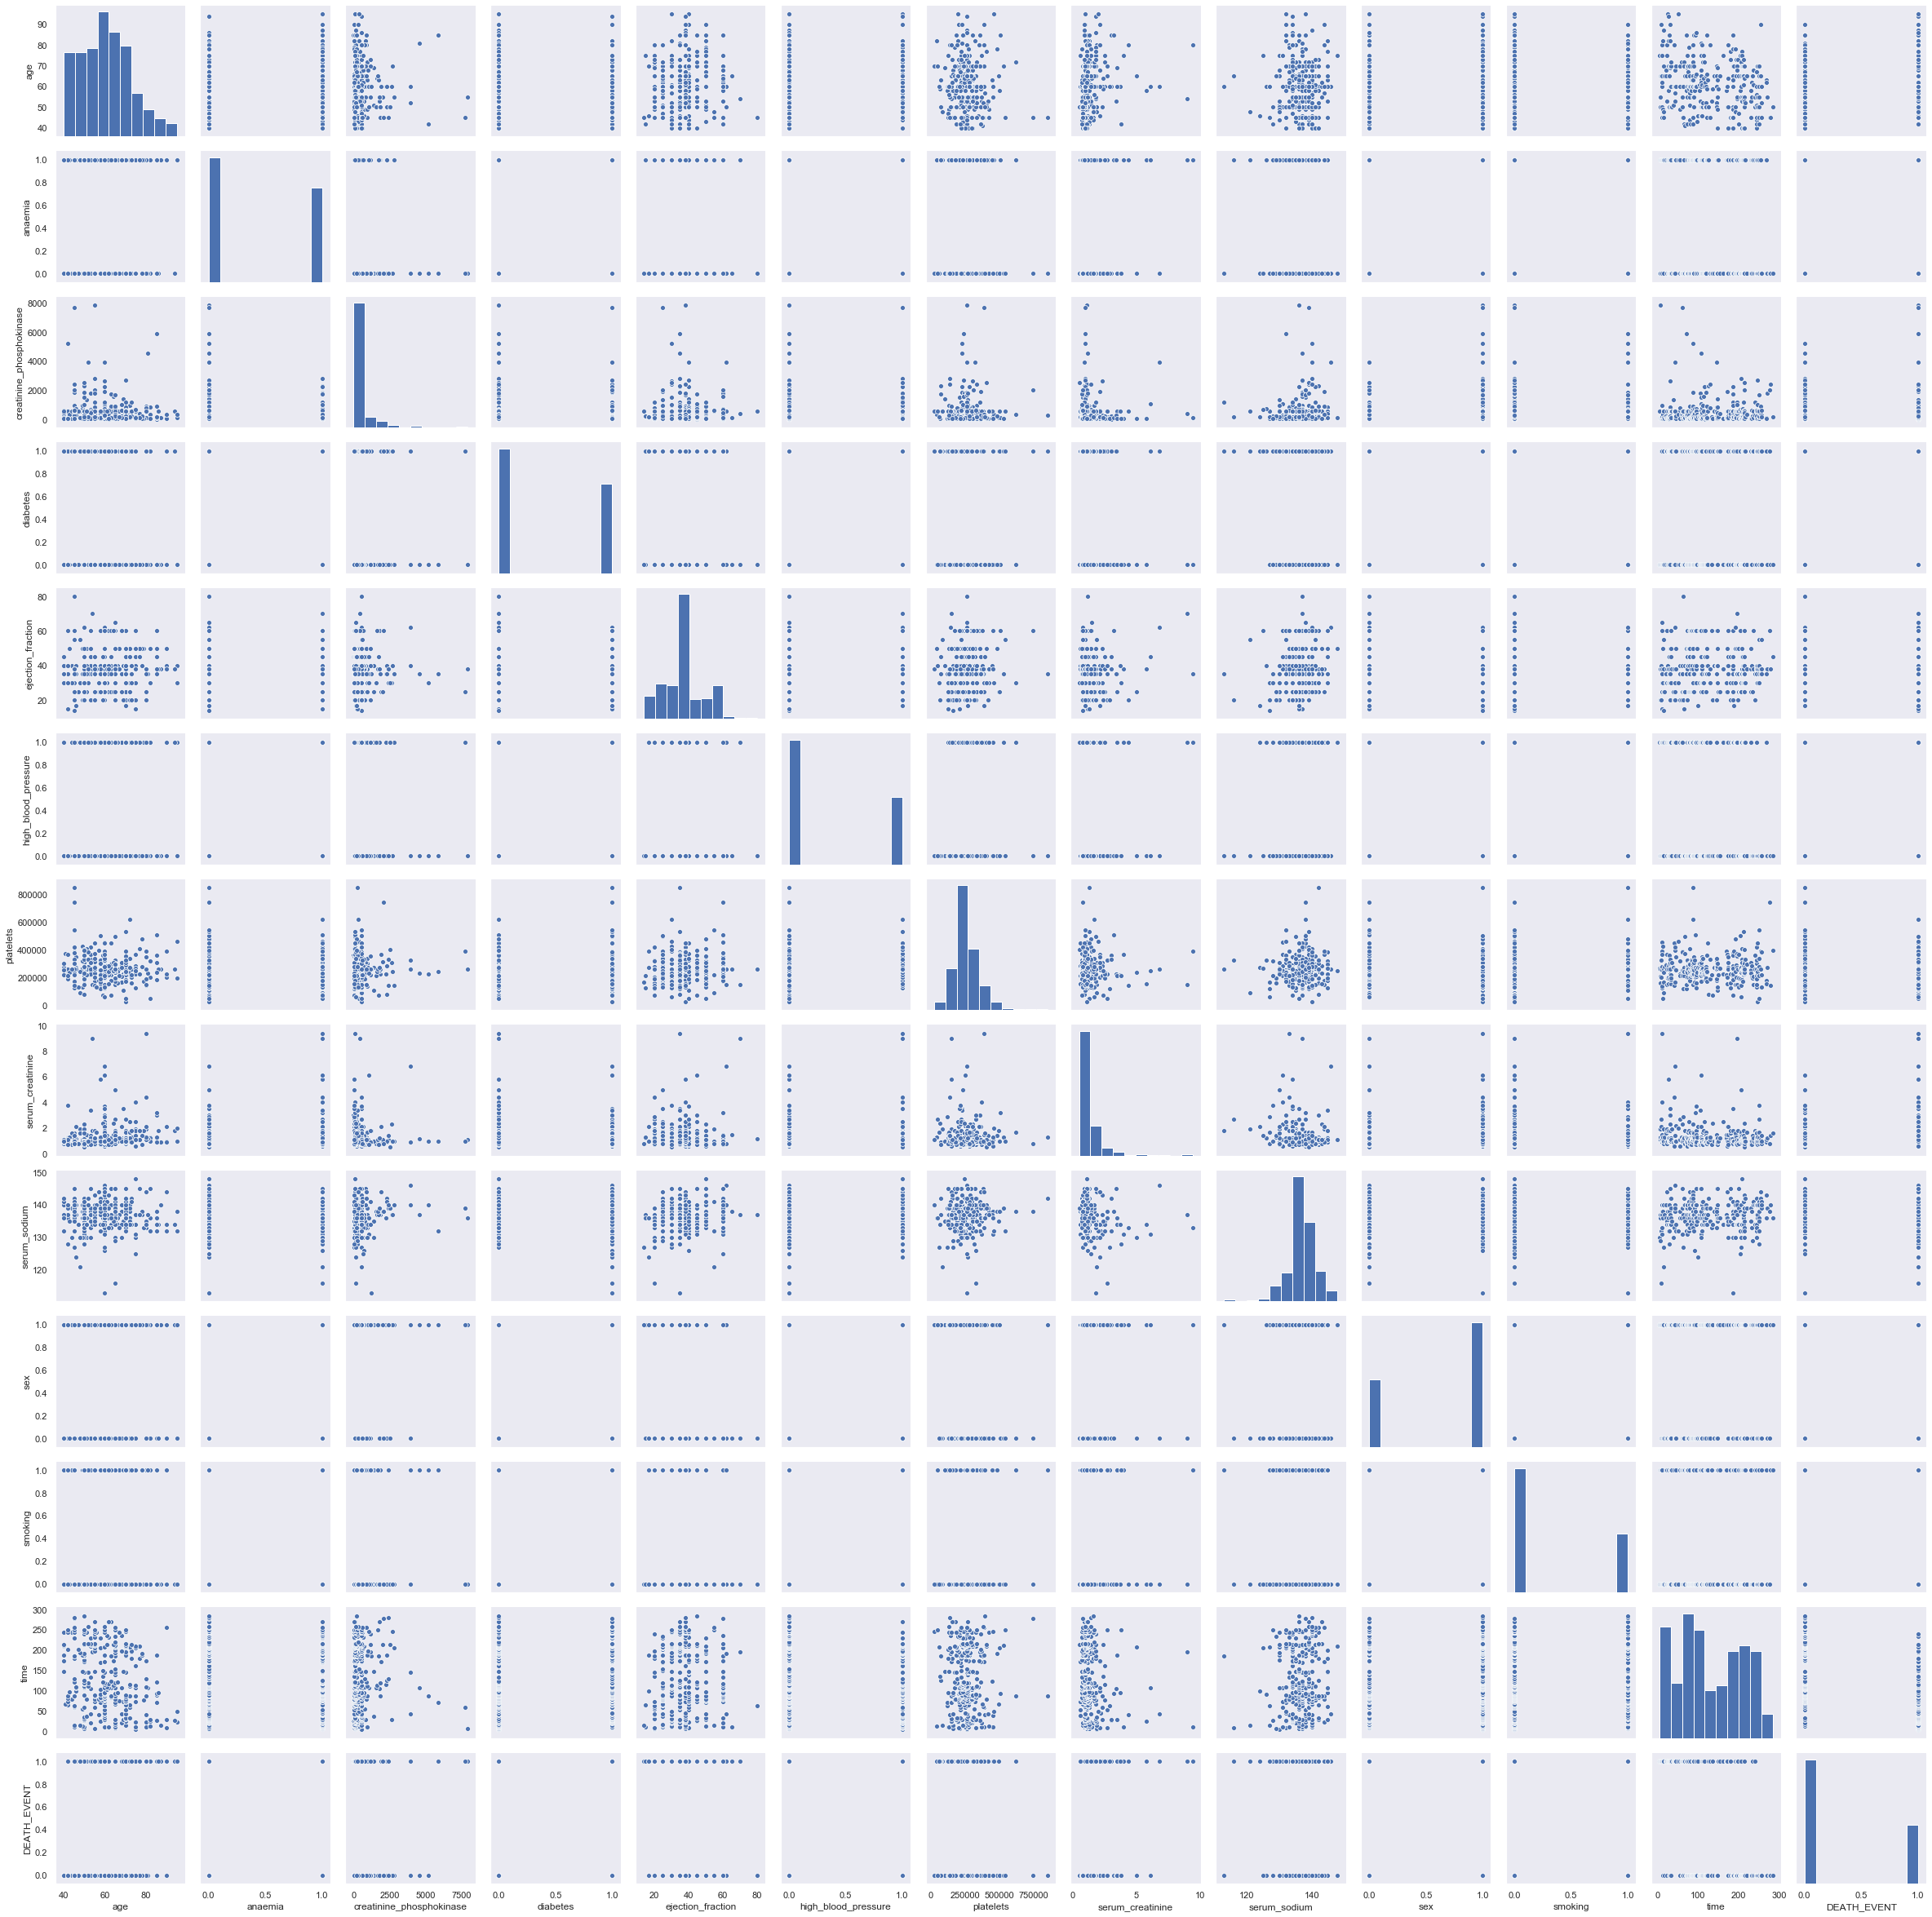

<Figure size 720x720 with 0 Axes>

In [63]:
#THIS are pairplots of the various features...
sns.pairplot(df)
plt.figure(figsize=(10,10))

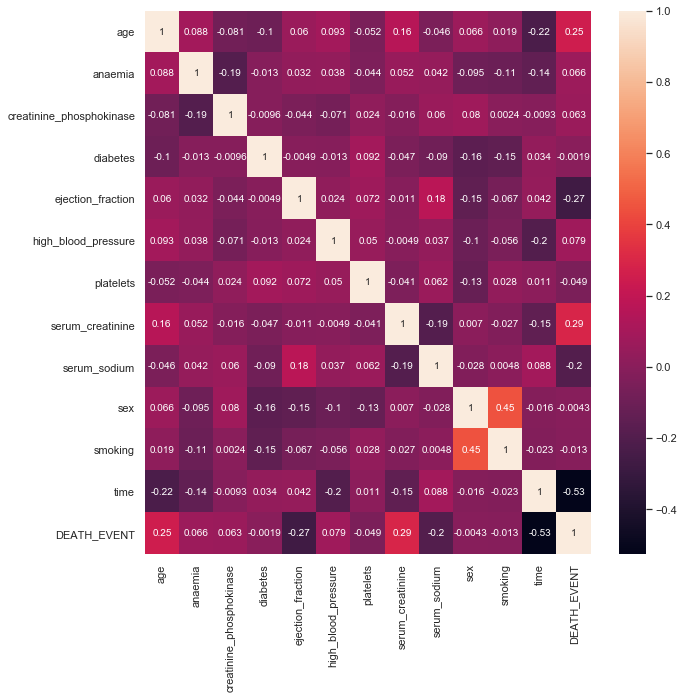

In [29]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [30]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253581
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' have a considerable correlation with 'DEATH_EVENT'

In [31]:
df1 =df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]

In [32]:
X = df1
y = df['DEATH_EVENT']

In [33]:

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [56]:
#Rule of thumb,Any algoritm that computes distance or assumes normalty,scale your features..
#feature scalling
from sklearn.preprocessing import LabelEncoder,StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

**First lets try KNN algorithm**

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=5) accuracy is: ',knn.score(X_test,y_test)) # accuracy


With KNN (K=5) accuracy is:  0.7333333333333333


**Lets find which k value will be most significant for our model**

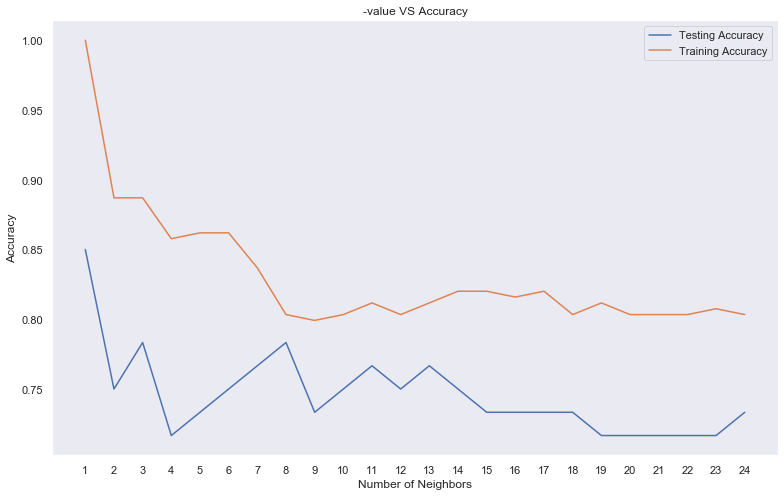

Best accuracy is 0.85 with K = 1


In [58]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

lets also try our Random forest algorithm

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[35  2]
 [ 8 15]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.88      0.65      0.75        23

    accuracy                           0.83        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.84      0.83      0.83        60



The accuracy for the random classifier simply gives us a 83%.i would definitely say thats good enough...

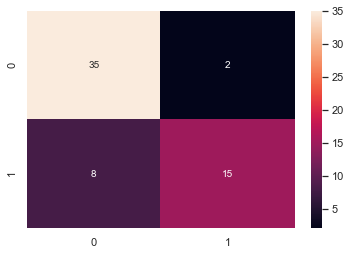

In [62]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

SO i would say we have come to a conclusion without elongating the process of building more algorithms

the once we already have, has given us accuracies that we can actually deploy the model for production...

if you would ask me one more time, i would gladly pick the KNN algorithm,because its accuracy was 85%,

which happened to be the best from all the models we built... 

